
# Support Vector Regression

## Steps to perform SVR

1.. Python imports

2.. Read the Datasets

3.. Split the Data into Independant and dependant features

4.. Plot the Data to check the Scaling factor

5.. If visualization is nonlinear, then scale the data 

6.. Fit the Data again using SVR()

7.. Predict the Data to get scaled form of prediction

8.. Inverse SVR to get the predicted data

9.. Visualize the SVR

We will perform the support vector regression over the datasets: Position_Salaries.

In [1]:
# Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read the Datasets

In [2]:
# reading the datasets
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


We have only 20 values in our datasets.

In [5]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# Split the Datasets

In [6]:
# Split the dataset into the dependent and independant variables
Y = dataset.iloc[:,2:].values
X = dataset.iloc[:,1:2].values

In [7]:
X[:5], Y[:5]

(array([[1],
        [2],
        [3],
        [4],
        [5]]), array([[ 45000],
        [ 50000],
        [ 60000],
        [ 80000],
        [110000]]))

## Plot the Data

Plot the data to check the  Scaling features whether we have to scale the features.

In [13]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


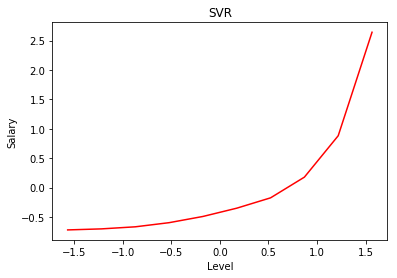

In [49]:
# Position feature doesnot plays an important for prediction so we will omit it in visualisation
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("SVR")
plt.plot(X,Y, color='red')

## Prediction without Scaling

In [15]:
# Instance of SVR
from sklearn.svm import SVR
regressor = SVR()
regressor

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
regressor.fit(X,Y)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

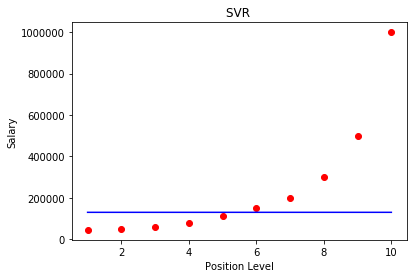

In [18]:
# visualize the graph for SVR results
plt.title("SVR ")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(X),color='blue')

We have not predicted the expected response (blue line) with respect to the original data. Because, we have not scale the data before fitting using StandardScalar.

In [20]:
# predict the data
y_pred = regressor.predict(6.5)

In [21]:
print("Predicted Salary for 6.5 level is :-- ", y_pred)

Predicted Salary for 6.5 level is :--  [ 130001.55760156]


The employer want the salary more than 1.6k. So, we have predicted less than his expected salary.

## Scale the Data

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [24]:
X = sc_X.fit_transform(X)
X

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [25]:
Y = sc_Y.fit_transform(Y)
Y

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Predict the Data after Scaling

In [29]:
# Fit the Data again
regressor_scale = SVR()
regressor_scale.fit(X,Y)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
# Predict the data after scaling the X and Y data.
y_pred = regressor_scale.predict(sc_X.transform([[6.5]]))
y_pred 

array([-0.27861589])

We get the scaled form of predicted output. We have to perform the inverse scaling over the predicted salary.

In [47]:
# we want the data into inverse scalar form
estimated_Salary = sc_Y.inverse_transform(y_pred)

In [48]:
print("Estimated salary for 6.5 level is:- ", estimated_Salary)

Estimated salary for 6.5 level is:-  [ 170370.0204065]


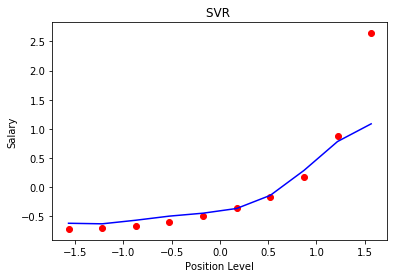

In [50]:
# visualize the graph for SVR results after scaling
plt.title("SVR ")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.scatter(X,Y,color='red')
plt.plot(X,regressor.predict(X),color='blue')


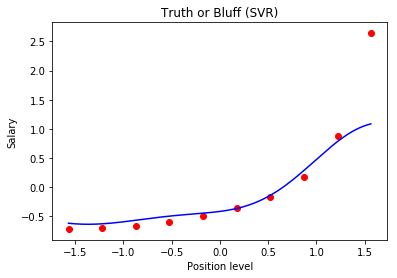

In [51]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# FINISH